# The pandas library

The [pandas library](https://pandas.pydata.org/) was created by [Wes McKinney](http://wesmckinney.com/) in 2010. pandas provides **data structures** and **functions** 
for manipulating, processing, cleaning and crunching data. In the Python ecosystem pandas is the state-of-the-art tool for working with tabular or spreadsheet-like data  in which each column may be a different type (`string`, `numeric`, `date` or other). pandas provides sophisticated indexing functionality to make it easy to reshape, slice and dice, perform aggregations, and select subsets of data. pandas relies on other packages, such as [NumPy](http://www.numpy.org/) and [SciPy](https://scipy.org/scipylib/index.html). 
Further pandas integrates [matplotlib](https://matplotlib.org/) for plotting. 

If you are new to pandas we strongly recommend to visit the very well written [__pandas tutorials__](https://pandas.pydata.org/pandas-docs/stable/tutorials.html), which cover all relevant sections for new users to properly get started.


Once installed (for details refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/install.html)), pandas is imported by using the canonical alias `pd`.

In [1]:
import pandas as pd

In [2]:
import numpy as np

The pandas library has two workhorse data structures: __*Series*__ and __*DataFrame*__.

* one dimensional `pd.Series` object
* two dimensional `pd.DataFrame` object

***

## The `pd.Series` object

Data generation

In [3]:
# import the random module from numpy
from numpy import random 
# set seed for reproducibility
random.seed(123) 
# generate 26 random integers between -10 and 10
my_data = random.randint(low=-10, high=10, size=26)
# print the data
my_data

array([  3,  -8,  -8,  -4,   7,   9,   0,  -9, -10,   7,   5,  -1, -10,
         4, -10,   5,   9,   4,  -6, -10,   6,  -6,   7,  -7,  -8,  -3])

In [ ]:
type(my_data)

A Series is a one-dimensional array-like object containing an array of data and an associated array of data labels, called its _index_. We create a `pd.Series` object by calling the `pd.Series()` function. 

In [ ]:
# Uncomment to look up the documentation

# docstring
#?pd.Series      

# source
#??pd.Series    

In [4]:
# create a pd.Series object
s = pd.Series(data=my_data)
s

0      3
1     -8
2     -8
3     -4
4      7
5      9
6      0
7     -9
8    -10
9      7
10     5
11    -1
12   -10
13     4
14   -10
15     5
16     9
17     4
18    -6
19   -10
20     6
21    -6
22     7
23    -7
24    -8
25    -3
dtype: int32

In [5]:
type(s)

pandas.core.series.Series

***

### `pd.Series` attributes

Python objects in general and the `pd.Series` in particular offer useful object-specific *attributes*.

* _attribute_ $\to$ `OBJECT.attribute` $\qquad$     _Note that the attribute is called without parenthesis_

In [6]:
s.dtypes

dtype('int32')

In [7]:
s.index

RangeIndex(start=0, stop=26, step=1)

We can use the `index` attribute to assign an index to a `pd.Series` object.

Consider the letters of the alphabet....

In [8]:
import string
letters = string.ascii_uppercase
letters

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

By providing an array-type object we assign a new index to the `pd.Series` object.

In [9]:
s.index = list(letters)

In [10]:
s.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='object')

In [11]:
s

A     3
B    -8
C    -8
D    -4
E     7
F     9
G     0
H    -9
I   -10
J     7
K     5
L    -1
M   -10
N     4
O   -10
P     5
Q     9
R     4
S    -6
T   -10
U     6
V    -6
W     7
X    -7
Y    -8
Z    -3
dtype: int32

***
### `pd.Series` methods

Methods are functions that are called using the attribute notation.  Hence they are called by appending a dot (`.`) to the Python object, followed by the name of the method, parentheses `()` and in case one or more arguments (`arg`). 

* _method_  $\to$ `OBJECT.method_name(arg1, arg2, ...)`

In [12]:
s.sum()

-34

In [13]:
s.mean()

-1.3076923076923077

In [14]:
s.max()

9

In [15]:
s.min()

-10

In [16]:
s.median()

-2.0

In [17]:
s.quantile(q=0.5)

-2.0

In [18]:
s.quantile(q=[0.25, 0.5, 0.75])

0.25   -8.0
0.50   -2.0
0.75    5.0
dtype: float64

In [19]:
s.quantile?

Signature:
s.quantile(
    q: 'float | Sequence[float] | AnyArrayLike' = 0.5,
    interpolation: 'QuantileInterpolation' = 'linear',
) -> 'float | Series'
Docstring:
Return value at the given quantile.

Parameters
----------
q : float or array-like, default 0.5 (50% quantile)
    The quantile(s) to compute, which can lie in range: 0 <= q <= 1.
interpolation : {'linear', 'lower', 'higher', 'midpoint', 'nearest'}
    This optional parameter specifies the interpolation method to use,
    when the desired quantile lies between two data points `i` and `j`:

        * linear: `i + (j - i) * fraction`, where `fraction` is the
          fractional part of the index surrounded by `i` and `j`.
        * lower: `i`.
        * higher: `j`.
        * nearest: `i` or `j` whichever is nearest.
        * midpoint: (`i` + `j`) / 2.

Returns
-------
float or Series
    If ``q`` is an array, a Series will be returned where the
    index is ``q`` and the values are the quantiles, otherwise
    a float wil

***
### Element-wise arithmetic


A very useful feature of `pd.Series` objects is that we may apply arithmetic operations *element-wise*.

In [ ]:
s+10
#s*0.1
#10/s
#s**2
#(2+s)*1**3
#s+s

***
### Selection and Indexing

Another main data operation is indexing and selecting particular subsets of the data object. pandas comes with a very [rich set of methods](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for these type of tasks.  

In its simplest form we index a Series numpy-like, by using the `[]` operator to select a particular `index` of the Series.

In [20]:
s

A     3
B    -8
C    -8
D    -4
E     7
F     9
G     0
H    -9
I   -10
J     7
K     5
L    -1
M   -10
N     4
O   -10
P     5
Q     9
R     4
S    -6
T   -10
U     6
V    -6
W     7
X    -7
Y    -8
Z    -3
dtype: int32

In [21]:
s[3]

-4

In [23]:
s[2:6]

C   -8
D   -4
E    7
F    9
dtype: int32

In [22]:
s["C"]

-8

In [24]:
s["C":"K"]

C    -8
D    -4
E     7
F     9
G     0
H    -9
I   -10
J     7
K     5
dtype: int32

***

## The `pd.DataFrame` object

The primary pandas data structure is the `DataFrame`. It is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with both row and column labels. Arithmetic operations align on both row and column labels. Basically, the `DataFrame` can be thought of as a `dictionary`-like container for Series objects. 




**Generate a `DataFrame` object from scratch** 

pandas facilitates the import of different data types and sources, however, for the sake of this tutorial we generate a `DataFrame` object from scratch. 

Source: http://duelingdata.blogspot.de/2016/01/the-beatles.html

In [3]:
df  = pd.DataFrame({"id" : range(1,5),
                    "Name" : ["John", "Paul", "George", "Ringo"],
                    "Last Name" : ["Lennon", "McCartney", "Harrison", "Star"],
                    "dead" : [True, False, True, False],
                    "year_born" : [1940, 1942, 1943, 1940],
                    "no_of_songs" : [62, 58, 24, 3]
                   })
df

,id,Name,Last Name,dead,year_born,no_of_songs
0,1,John,Lennon,True,1940,62
1,2,Paul,McCartney,False,1942,58
2,3,George,Harrison,True,1943,24
3,4,Ringo,Star,False,1940,3


***
### `pd.DataFrame` attributes

In [26]:
df.dtypes

id              int64
Name           object
Last Name      object
dead             bool
year_born       int64
no_of_songs     int64
dtype: object

In [27]:
# axis 0
df.columns

Index(['id', 'Name', 'Last Name', 'dead', 'year_born', 'no_of_songs'], dtype='object')

In [28]:
# axis 1
df.index

RangeIndex(start=0, stop=4, step=1)

***
### `pd.DataFrame` methods


**Get a quick overview of the data set**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           4 non-null      int64 
 1   Name         4 non-null      object
 2   Last Name    4 non-null      object
 3   dead         4 non-null      bool  
 4   year_born    4 non-null      int64 
 5   no_of_songs  4 non-null      int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 292.0+ bytes


In [30]:
df.describe()

,id,year_born,no_of_songs
count,4.000000,4.00,4.000000
mean,2.500000,1941.25,36.750000
std,1.290994,1.50,28.229712
min,1.000000,1940.00,3.000000
25%,1.750000,1940.00,18.750000
50%,2.500000,1941.00,41.000000
75%,3.250000,1942.25,59.000000
max,4.000000,1943.00,62.000000


In [31]:
df.describe(include="all")

,id,Name,Last Name,dead,year_born,no_of_songs
count,4.000000,4,4,4,4.00,4.000000
unique,NaN,4,4,2,NaN,NaN
top,NaN,John,Lennon,True,NaN,NaN
freq,NaN,1,1,2,NaN,NaN
mean,2.500000,NaN,NaN,NaN,1941.25,36.750000
std,1.290994,NaN,NaN,NaN,1.50,28.229712
min,1.000000,NaN,NaN,NaN,1940.00,3.000000
25%,1.750000,NaN,NaN,NaN,1940.00,18.750000
50%,2.500000,NaN,NaN,NaN,1941.00,41.000000
75%,3.250000,NaN,NaN,NaN,1942.25,59.000000


**Change index to the variable `id`**

In [32]:
df

,id,Name,Last Name,dead,year_born,no_of_songs
0,1,John,Lennon,True,1940,62
1,2,Paul,McCartney,False,1942,58
2,3,George,Harrison,True,1943,24
3,4,Ringo,Star,False,1940,3


In [33]:
df.set_index("id")

,Name,Last Name,dead,year_born,no_of_songs
id,,,,,
1,John,Lennon,True,1940,62
2,Paul,McCartney,False,1942,58
3,George,Harrison,True,1943,24
4,Ringo,Star,False,1940,3


In [34]:
df

,id,Name,Last Name,dead,year_born,no_of_songs
0,1,John,Lennon,True,1940,62
1,2,Paul,McCartney,False,1942,58
2,3,George,Harrison,True,1943,24
3,4,Ringo,Star,False,1940,3


Note that nothing changed!!

For the purpose of memory and computation efficiency `pandas` returns a view of the object, rather than a copy. Hence, if we want to make a permanent change we have to assign/reassign the object to a variable:

    df = df.set_index("id") 
    
or, some methods have the `inplace=True` argument:

    df.set_index("id", inplace=True)   

In [35]:
df2 = df.copy()

In [36]:
df2 = df2.set_index("id")

In [37]:
df2

,Name,Last Name,dead,year_born,no_of_songs
id,,,,,
1,John,Lennon,True,1940,62
2,Paul,McCartney,False,1942,58
3,George,Harrison,True,1943,24
4,Ringo,Star,False,1940,3


**Arithmetic methods**

In [38]:
df

,id,Name,Last Name,dead,year_born,no_of_songs
0,1,John,Lennon,True,1940,62
1,2,Paul,McCartney,False,1942,58
2,3,George,Harrison,True,1943,24
3,4,Ringo,Star,False,1940,3


In [39]:
df.sum(axis=0)

id                                      10
Name                   JohnPaulGeorgeRingo
Last Name      LennonMcCartneyHarrisonStar
dead                                     2
year_born                             7765
no_of_songs                            147
dtype: object

In [4]:
df.sum(axis=1,numeric_only=True)

0    2004
1    2002
2    1971
3    1947
dtype: object

#### `groupby` method
[Hadley Wickham 2011: The Split-Apply-Combine Strategy for Data Analysis, Journal of Statistical Software, 40(1)](https://www.jstatsoft.org/article/view/v040i01)

<img src="_img/split-apply-combine.svg" width="800">

Image source: [Jake VanderPlas 2016, Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

In [5]:
df_example  = pd.DataFrame({"key" : ['A','B','C','A','B','C'],
                    "data" : [1,2,3,4,5,6]})
df_example

,key,data
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


In [6]:
df_example.groupby('key').sum()

,data
key,
A,5
B,7
C,9


In [7]:
df

,id,Name,Last Name,dead,year_born,no_of_songs
0,1,John,Lennon,True,1940,62
1,2,Paul,McCartney,False,1942,58
2,3,George,Harrison,True,1943,24
3,4,Ringo,Star,False,1940,3


In [8]:
df.groupby("dead")

In [9]:
df.groupby("dead").sum(numeric_only=True)

,id,year_born,no_of_songs
dead,,,
False,6,3882,61
True,4,3883,86


In [50]:
df.groupby("dead")["no_of_songs"].sum()

dead
False    61
True     86
Name: no_of_songs, dtype: int64

In [51]:
df.groupby("dead")["no_of_songs"].mean()

dead
False    30.5
True     43.0
Name: no_of_songs, dtype: float64

In [52]:
df.groupby("dead")["no_of_songs"].agg(["mean", "max", "min", "sum"])

,mean,max,min,sum
dead,,,,
False,30.5,58,3,61
True,43.0,62,24,86


#### Family of `apply`/`map` methods

* `apply` works on a row (`axis=0`, default) / column (`axis=1`) basis of a `DataFrame`
* `applymap` works __element-wise__ on a `DataFrame`
* `map` works __element-wise__ on a `Series`.


In [53]:
df

,id,Name,Last Name,dead,year_born,no_of_songs
0,1,John,Lennon,True,1940,62
1,2,Paul,McCartney,False,1942,58
2,3,George,Harrison,True,1943,24
3,4,Ringo,Star,False,1940,3


In [54]:
# (axis=0, default)
df[["Name", "Last Name"]].apply(lambda x: x.sum())

Name                 JohnPaulGeorgeRingo
Last Name    LennonMcCartneyHarrisonStar
dtype: object

In [55]:
# (axis=1)
df[["Name", "Last Name"]].apply(lambda x: x.sum(), axis=1)

0        JohnLennon
1     PaulMcCartney
2    GeorgeHarrison
3         RingoStar
dtype: object

_... maybe a more useful case ..._

In [56]:
df.apply(lambda x: x["Name"] + " " + x["Last Name"], axis=1)

0        John Lennon
1     Paul McCartney
2    George Harrison
3         Ringo Star
dtype: object

***
### Selection and Indexing

**Column index**

In [57]:
df["Name"]

0      John
1      Paul
2    George
3     Ringo
Name: Name, dtype: object

In [58]:
df[["Name", "Last Name"]]

,Name,Last Name
0,John,Lennon
1,Paul,McCartney
2,George,Harrison
3,Ringo,Star


In [59]:
df.dead

0     True
1    False
2     True
3    False
Name: dead, dtype: bool

In [60]:
df.Name

0      John
1      Paul
2    George
3     Ringo
Name: Name, dtype: object

**Row index**

In addition to the `[]` operator pandas ships with other indexing operators such as `.loc[]` and `.iloc[]`, among others.

* `.loc[]` is primarily __label based__, but may also be used with a boolean array.
* `.iloc[]` is primarily __integer position based__ (from 0 to length-1 of the axis), but may also be used with a boolean array. 


In [61]:
df.head(2)

,id,Name,Last Name,dead,year_born,no_of_songs
0,1,John,Lennon,True,1940,62
1,2,Paul,McCartney,False,1942,58


In [65]:
df.loc[1,'Name']

'Paul'

In [64]:
df.iloc[1,1]

'Paul'

**Row and Columns indices**

`df.loc[row, col]`

In [ ]:
df.loc[1, "Last Name"]

In [ ]:
df.loc[2:4, ["Name", "dead"]]

In [ ]:
df.iloc[2:4][["Name", "dead"]]

**Logical indexing**

In [66]:
df

,id,Name,Last Name,dead,year_born,no_of_songs
0,1,John,Lennon,True,1940,62
1,2,Paul,McCartney,False,1942,58
2,3,George,Harrison,True,1943,24
3,4,Ringo,Star,False,1940,3


In [67]:
df["no_of_songs"] > 50

0     True
1     True
2    False
3    False
Name: no_of_songs, dtype: bool

In [68]:
df.loc[df["no_of_songs"] > 50]

,id,Name,Last Name,dead,year_born,no_of_songs
0,1,John,Lennon,True,1940,62
1,2,Paul,McCartney,False,1942,58


In [69]:
df.loc[(df["no_of_songs"] > 50) & (df["year_born"] >= 1942)]

,id,Name,Last Name,dead,year_born,no_of_songs
1,2,Paul,McCartney,False,1942,58


In [72]:
df.loc[(df["no_of_songs"] > 50) & (df["year_born"] >= 1942), ['id',"Last Name", "Name"]]

,id,Last Name,Name
1,2,McCartney,Paul


***

### Manipulating columns, rows and particular entries

**Add a row to the data set**

In [75]:
from numpy import nan
df.loc[5] = [5,"Mickey", "Mouse", nan, 1928, nan]
df

,id,Name,Last Name,dead,year_born,no_of_songs
0,1,John,Lennon,True,1940.0,62.0
1,2,Paul,McCartney,False,1942.0,58.0
2,3,George,Harrison,True,1943.0,24.0
3,4,Ringo,Star,False,1940.0,3.0
5,5,Mickey,Mouse,NaN,1928.0,NaN


In [78]:
df.loc[5,'dead'] = False
df

,id,Name,Last Name,dead,year_born,no_of_songs
0,1,John,Lennon,True,1940.0,62.0
1,2,Paul,McCartney,False,1942.0,58.0
2,3,George,Harrison,True,1943.0,24.0
3,4,Ringo,Star,False,1940.0,3.0
5,5,Mickey,Mouse,False,1928.0,NaN


In [76]:
df.dtypes

id              object
Name            object
Last Name       object
dead            object
year_born      float64
no_of_songs    float64
dtype: object

_Note that the variable `dead` changed. Its values changed from `True`/`False` to `1.0`/`0.0`. Consequently its `dtype` changed from `bool` to `float64`._

**Add a column to the data set**

In [79]:
from datetime import datetime
datetime.today()

datetime.datetime(2023, 3, 2, 14, 10, 41, 512909)

In [80]:
now = datetime.today().year
now

2023

In [81]:
df["age"] = now - df.year_born
df

,id,Name,Last Name,dead,year_born,no_of_songs,age
0,1,John,Lennon,True,1940.0,62.0,83.0
1,2,Paul,McCartney,False,1942.0,58.0,81.0
2,3,George,Harrison,True,1943.0,24.0,80.0
3,4,Ringo,Star,False,1940.0,3.0,83.0
5,5,Mickey,Mouse,False,1928.0,NaN,95.0


**Change a particular entry**

In [82]:
df.loc[5, "Name"] = "Minnie" 

In [83]:
df

,id,Name,Last Name,dead,year_born,no_of_songs,age
0,1,John,Lennon,True,1940.0,62.0,83.0
1,2,Paul,McCartney,False,1942.0,58.0,81.0
2,3,George,Harrison,True,1943.0,24.0,80.0
3,4,Ringo,Star,False,1940.0,3.0,83.0
5,5,Minnie,Mouse,False,1928.0,NaN,95.0


***
## Plotting

The plotting functionality in pandas is built on top of matplotlib. It is quite convenient to start the visualization process with basic pandas plotting and to switch to matplotlib to customize the pandas visualization.

### `plot` method

In [84]:
# this call causes the figures to be plotted below the code cells
%matplotlib inline

In [85]:
df

,id,Name,Last Name,dead,year_born,no_of_songs,age
0,1,John,Lennon,True,1940.0,62.0,83.0
1,2,Paul,McCartney,False,1942.0,58.0,81.0
2,3,George,Harrison,True,1943.0,24.0,80.0
3,4,Ringo,Star,False,1940.0,3.0,83.0
5,5,Minnie,Mouse,False,1928.0,NaN,95.0


<AxesSubplot: >

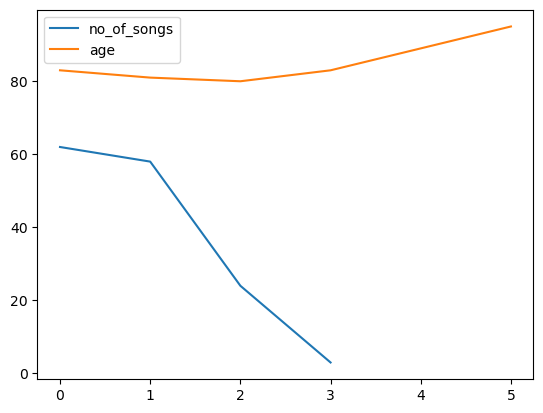

In [86]:
df[["no_of_songs", "age"]].plot()

<AxesSubplot: ylabel='Frequency'>

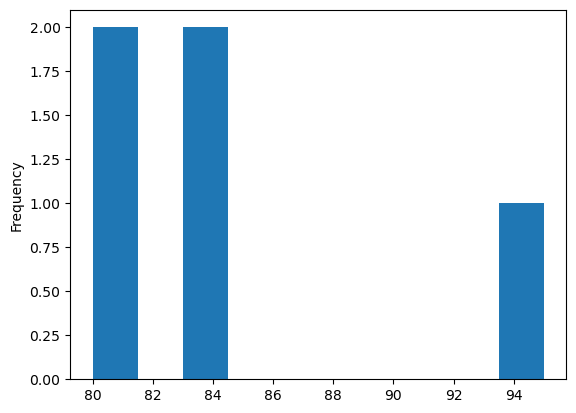

In [88]:
df["age"].plot.hist()

<AxesSubplot: >

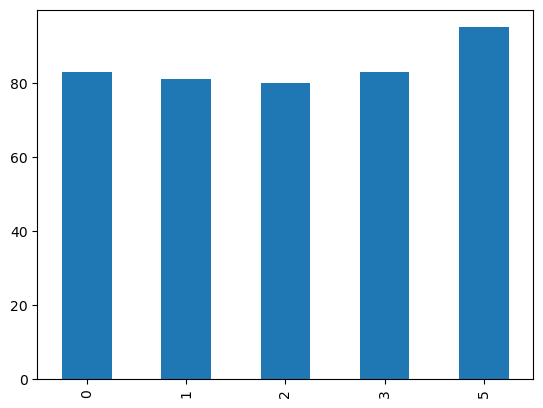

In [89]:
df["age"].plot.bar()

## ...some notes on plotting with Python


Plotting is an essential component of data analysis. However, the Python visualization world can be a frustrating place. There are many different options and choosing the right one is a challenge. (If you dare take a look at the [Python Visualization Landscape](https://github.com/rougier/python-visualization-landscape).)


[matplotlib](https://matplotlib.org/) is probably the most well known 2D plotting Python library. It allows to produce publication quality figures in a variety of formats and interactive environments across platforms. However, matplotlib is the cause of frustration due to the complex syntax and due to existence of two interfaces, a __MATLAB like state-based interface__ and an __object-oriented interface__. Hence, __there is always more than one way to build a visualization__. Another source of confusion is that matplotlib is well integrated into other Python libraries, such as [pandas](http://pandas.pydata.org/index.html), [seaborn](http://seaborn.pydata.org/index.html), [xarray](http://xarray.pydata.org/en/stable/), among others. Hence, there is confusion as when to use pure matplotlib or a tool that is built on top of matplotlib.

We import the `matplotlib` library and matplotlib's `pyplot` module using the canonical commands

    import matplotlib as mpl
    import matplotlib.pyplot as plt

With respect to matplotlib terminology it is important to understand that the __`Figure`__ is the final image that may contain one or more axes, and that the __`Axes`__ represents an individual plot.

To create a `Figure` object we call

    fig = plt.figure()

However, a more convenient way to create a `Figure` object and an `Axes` object at once, is to call

    fig, ax = plt.subplots() 

Then we can use the `Axes` object to add data for ploting. 

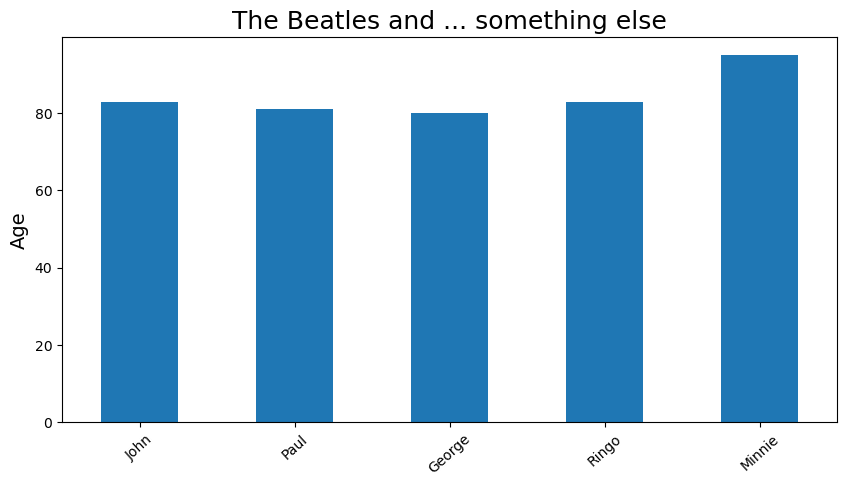

In [92]:
import matplotlib.pyplot as plt

# create a Figure and Axes object
fig, ax = plt.subplots(figsize=(10,5)) 

# plot the data and reference the Axes object
df["age"].plot.bar(ax=ax)

# add some customization to the Axes object
ax.set_xticklabels(df["Name"], rotation=42)
ax.set_xlabel("")
ax.set_ylabel("Age", size=14)
ax.set_title("The Beatles and ... something else", size=18);

Note that we are only scratching the surface of the plotting capabilities with pandas. Refer to the pandas online documentation ([here](https://pandas.pydata.org/pandas-docs/stable/visualization.html)) for a comprehensive overview.


***